<a href="https://colab.research.google.com/github/Miyakoturner3/Miyakoturner3/blob/main/EEN651mod2HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1

In [ ]:
import os

# If the repo isn't already there, clone it
if not os.path.exists('ThinkDSP'):
    !git clone https://github.com/AllenDowney/ThinkDSP.git

# Move into the directory so Python can find the modules
os.chdir('ThinkDSP/code')

# Install any missing dependencies (Colab has most, but just in case)
!pip install -q numpy scipy matplotlib

Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2684, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2684 (delta 0), reused 0 (delta 0), pack-reused 2682 (from 2)
Receiving objects: 100% (2684/2684), 254.48 MiB | 28.35 MiB/s, done.
Resolving deltas: 100% (1465/1465), done.


In [ ]:
import numpy as np
from thinkdsp import Signal

class SawtoothSignal(Signal):
    """Represents a sawtooth signal."""

    def __init__(self, amp=1.0, freq=440, offset=0):
        super().__init__() # Call the parent constructor without arguments
        self.amp = amp
        self.freq = freq
        self.offset = offset

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        returns: float wave array
        """
        # Calculate the phase at each time point
        # cycles is the number of cycles since time 0
        cycles = self.freq * ts + self.offset / (2 * np.pi)

        # np.modf returns the fractional part (frac) and integer part
        # The fractional part goes from 0 to 1
        frac, _ = np.modf(cycles)

        # Scale and shift the fractional part from [0, 1] to [-1, 1]
        ys = self.amp * (2 * frac - 1)

        return ys

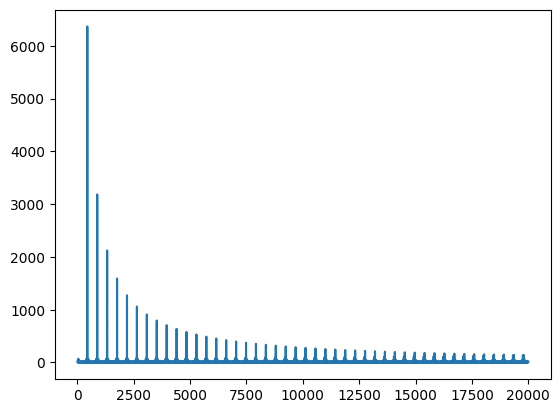

In [ ]:
# Create the signal and wave
signal = SawtoothSignal(freq=440)
wave = signal.make_wave(duration=0.5, framerate=40000)

# Compute the Fast Fourier Transform (FFT)
spectrum = wave.make_spectrum()

# Scale and visualize
spectrum.plot()

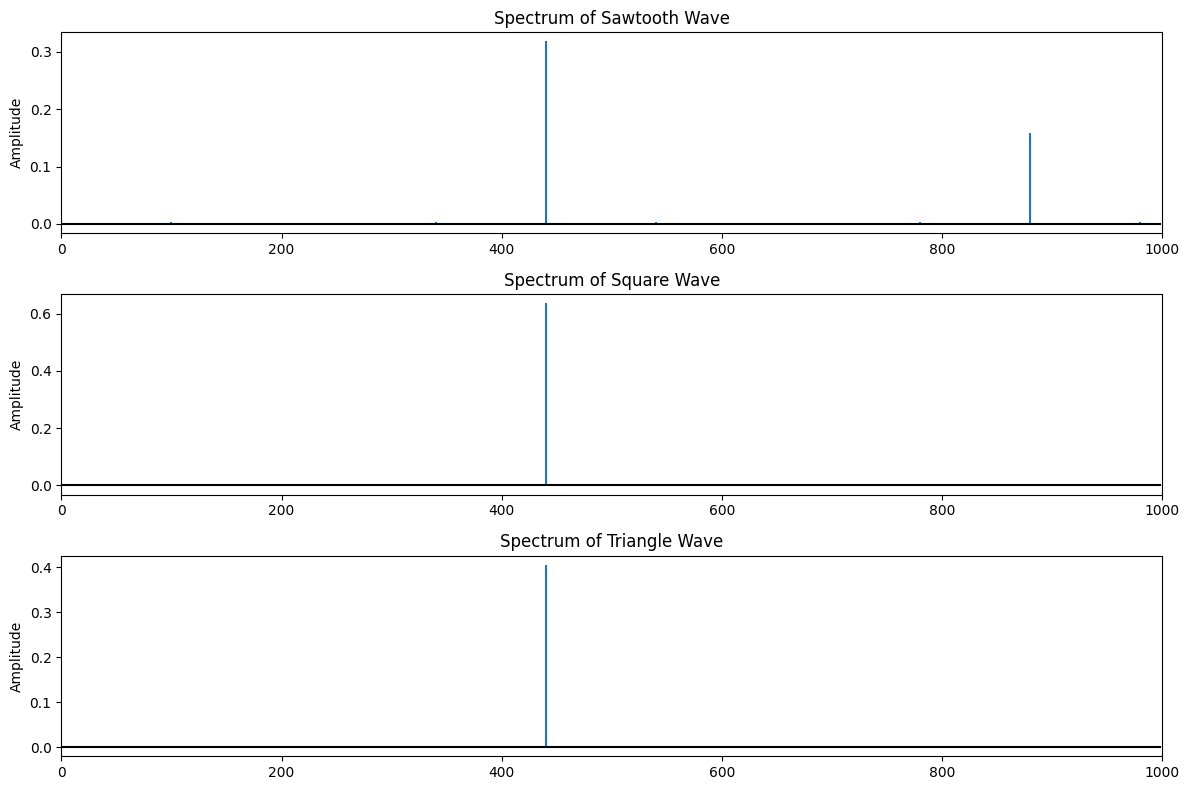

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_spectrum(signal, framerate):
    n = len(signal)
    freqs = np.fft.rfftfreq(n, d=1/framerate)
    amps = np.abs(np.fft.rfft(signal)) / n
    return freqs, amps

# Parameters
freq = 440  # Fundamental frequency (A4)
framerate = 44100
duration = 0.5
t = np.linspace(0, duration, int(framerate * duration), endpoint=False)

# 1. Sawtooth: All harmonics, 1/n decay
sawtooth = 2 * (freq * t - np.floor(0.5 + freq * t))

# 2. Square: Odd harmonics, 1/n decay
square = np.sign(np.sin(2 * np.pi * freq * t))

# 3. Triangle: Odd harmonics, 1/n^2 decay
triangle = 2 * np.abs(2 * (freq * t - np.floor(0.5 + freq * t))) - 1

# Plotting
waves = [('Sawtooth', sawtooth), ('Square', square), ('Triangle', triangle)]
plt.figure(figsize=(12, 8))

for i, (name, data) in enumerate(waves):
    f, a = get_spectrum(data, framerate)
    plt.subplot(3, 1, i+1)
    plt.stem(f[:500], a[:500], markerfmt=" ", basefmt="-k")
    plt.title(f"Spectrum of {name} Wave")
    plt.ylabel("Amplitude")
    plt.xlim(0, 1000) # Show harmonics up to 5kHz

plt.tight_layout()
plt.show()

The distinct timbres of sawtooth, square, and triangle waves are defined by their specific harmonic compositions and decay rates. The sawtooth wave is the most complex, containing every integer harmonic (both even and odd) with an amplitude decay of 1/n resulting in a bright, buzzy sound ideal for lead synths.
The square wave shares this 1/n decay rate but omits all even harmonics, producing a "hollow" or "woody" quality reminiscent of 8-bit audio. Meanwhile, the triangle wave also lacks even harmonics but sounds significantly darker and smoother because its energy dissipates much faster at a rate of 1/n2. This aggressive drop-off in higher frequencies places the triangle wave’s tone between the sharp bite of a square wave and the purity of a sine wave.


2.2


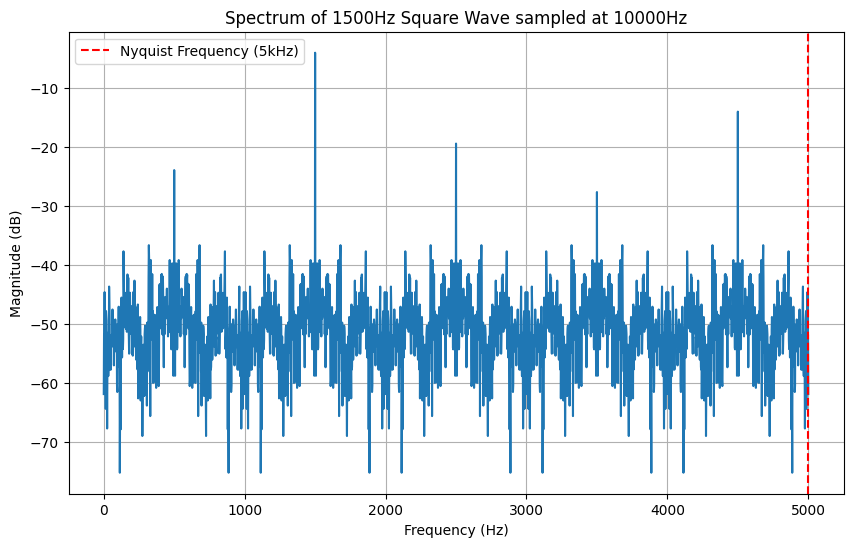

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
fs = 10000  # Sampling frequency (10kHz)
f0 = 1500   # Square wave frequency (1.5kHz)
duration = 0.5
t = np.arange(0, duration, 1/fs)

# Generate Square Wave
# Note: signal.square generates a non-bandlimited (naive) square wave
y = signal.square(2 * np.pi * f0 * t)

# Perform FFT
n = len(y)
freqs = np.fft.rfftfreq(n, 1/fs)
fft_vals = np.abs(np.fft.rfft(y)) / n

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(freqs, 20 * np.log10(fft_vals + 1e-6)) # Convert to dB for visibility
plt.title(f"Spectrum of 1500Hz Square Wave sampled at {fs}Hz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.axvline(fs/2, color='r', linestyle='--', label='Nyquist Frequency (5kHz)')
plt.legend()
plt.show()

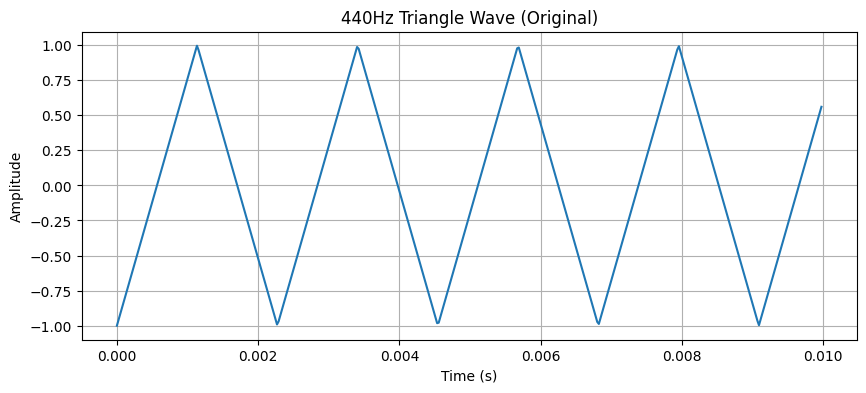

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 44100
duration = 0.01
f0 = 440
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Create a triangle wave centered at 0 (amplitude peaks at -1 and 1)
wave = signal.sawtooth(2 * np.pi * f0 * t, width=0.5)

plt.figure(figsize=(10, 4))
plt.plot(t, wave)
plt.title("440Hz Triangle Wave (Original)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

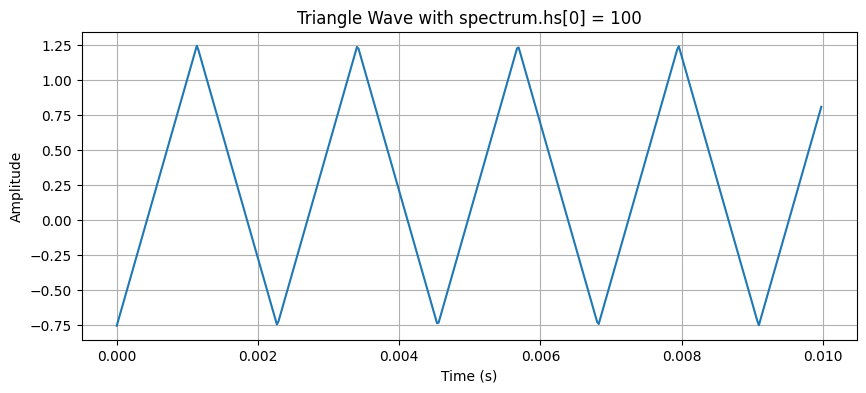

In [ ]:
# Compute FFT
spectrum_hs = np.fft.rfft(wave)

# Modify the DC component (0 Hz)
spectrum_hs[0] = 100

# Reconstruct the wave, specifying the original length
modified_wave = np.fft.irfft(spectrum_hs, n=len(t))

plt.figure(figsize=(10, 4))
plt.plot(t, modified_wave)
plt.title("Triangle Wave with spectrum.hs[0] = 100")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

While a band-limited 1500Hz square wave would sound clean and woody—containing only the 1500Hz and 4500Hz tones—aliasing introduces harsh, inharmonic artifacts. Because the higher harmonics fold back across the Nyquist frequency, you will hear a prominent 500Hz ghost tone alongside extra mid-range frequencies at 2500Hz and 3500Hz that do not belong to the original series. This creates a metallic, distorted timbre reminiscent of an old school video game sound effects rather than a natural, organ-like tone.

2.3

In [ ]:
import numpy as np
from thinkdsp import SinSignal

# 1. A standard sine wave (Average = 0)
signal_centered = SinSignal(freq=440, amp=1.0)
wave1 = signal_centered.make_wave(duration=0.5, framerate=10000)
spectrum1 = wave1.make_spectrum()

# 2. The same wave, shifted up by 5 units (Average = 5)
wave2 = wave1.copy()
wave2.ys += 5  # This adds a "DC offset"
spectrum2 = wave2.make_spectrum()

print(f"Centered signal hs[0]: {np.abs(spectrum1.hs[0]):.2f}")
print(f"Shifted signal hs[0]:  {np.abs(spectrum2.hs[0]):.2f}")

Centered signal hs[0]: 0.00
Shifted signal hs[0]:  25000.00


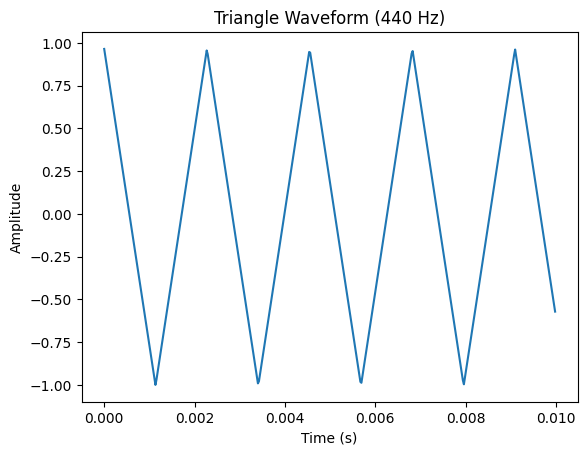

In [ ]:
from thinkdsp import TriangleSignal
import matplotlib.pyplot as plt

# 1. Create the Triangle signal
signal = TriangleSignal(freq=440)

# 2. Convert it to a Wave object
# We use a high framerate to ensure the points are smooth
wave = signal.make_wave(duration=0.01, framerate=44100)

# 3. Plot the waveform
wave.plot()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Triangle Waveform (440 Hz)')
plt.show()

In the case of spectrum1, the wave oscillates symmetrically above and below the horizontal axis, meaning the positive and negative areas cancel each other out and result in a mathematical average of zero. Consequently, the magnitude at hs[0]—which tracks this average—will be nearly zero. In contrast, spectrum2 has been shifted upward by adding a constant value of 5 to every data point, effectively raising the entire signal's floor. Because the signal now lives at a higher level, the Fourier Transform identifies this non-zero average as a constant, non-oscillating component and stores that information at the very first index of the array.

When you perform an FFT on a perfectly symmetrical triangle wave centered at zero, the hs[0] component—which represents the DC offset or average value—results in an amplitude of 0 (or a negligible value near 10-16 due to floating-point errors). Because the magnitude is zero, the phase is mathematically undefined, though software typically defaults it to 0.
If you manually set spectrum.hs[0] = 100, you are adding a constant value to the signal's average. When transformed back into a waveform, the shape and frequency remain identical, but the entire signal undergoes a uniform vertical shift on the Y-axis. This results in a waveform that oscillates around an elevated level rather than zero.

The effect on the waveform is the geometric shape of the triangle wave remains exactly the same, when you modify the zero-frequency component of the spectrum, but the entire waveform is shifted upwards on the Y-axis. While the original wave swings symmetrically between -1 and +1 around a zero-centered baseline, the modified wave's vertical position is redefined by the new average value of 100 / N, where N represents the total number of samples. In practical audio terms, this operation creates a massive DC offset, moving the oscillation away from the center and potentially causing issues like digital clipping or hardware strain.


2.4

In [ ]:
import numpy as np

def divide_by_freq(spectrum):

    # Create a copy of frequencies to avoid ZeroDivisionError
    # We set the 0Hz component's divisor to 1 (neutral)
    divisors = spectrum.fs.copy()
    divisors[divisors == 0] = 1

    # Modify the magnitudes (hs) in place
    spectrum.hs /= divisors

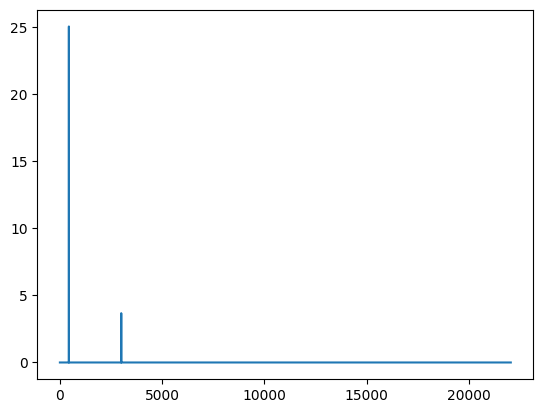

In [ ]:
from thinkdsp import SinSignal, CosSignal

# 1. Create a mixture of a low (440Hz) and high (3000Hz) frequency tone
low_tone = SinSignal(freq=440, amp=1.0)
high_tone = SinSignal(freq=3000, amp=1.0)
wave = (low_tone + high_tone).make_wave(duration=0.5, framerate=44100)

# 2. Generate the spectrum
spectrum = wave.make_spectrum()

# 3. Apply the function
divide_by_freq(spectrum)

# 4. Convert back to a wave to hear the result (optional)
# The high-frequency tone should now be much quieter
filtered_wave = spectrum.make_wave()
spectrum.plot()

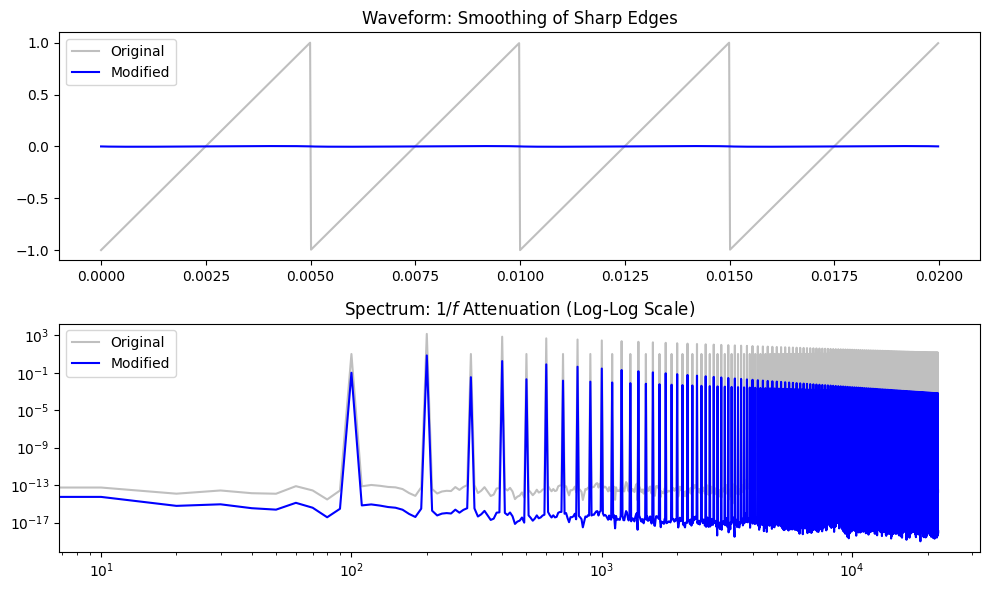

In [ ]:
import matplotlib.pyplot as plt

# 1. Generate a Sawtooth signal (rich in harmonics)
from thinkdsp import SawtoothSignal
wave = SawtoothSignal(freq=200).make_wave(duration=0.1, framerate=44100)
spectrum = wave.make_spectrum()

# 2. Apply the division
# We'll keep a copy of the original for comparison
original_spectrum = wave.make_spectrum()
divide_by_freq(spectrum)
filtered_wave = spectrum.make_wave()

# 3. Plotting
plt.figure(figsize=(10, 6))

# Plot Time Domain (The Waveform)
plt.subplot(2, 1, 1)
wave.segment(duration=0.02).plot(color='gray', alpha=0.5, label='Original')
filtered_wave.segment(duration=0.02).plot(color='blue', label='Modified')
plt.title("Waveform: Smoothing of Sharp Edges")
plt.legend()

# Plot Frequency Domain (The Spectrum)
plt.subplot(2, 1, 2)
original_spectrum.plot(color='gray', alpha=0.5, label='Original')
spectrum.plot(color='blue', label='Modified')
plt.xscale('log')
plt.yscale('log')
plt.title("Spectrum: $1/f$ Attenuation (Log-Log Scale)")
plt.legend()

plt.tight_layout()
plt.show()

Effect on Waveform: 	By dividing the spectrum by frequency, you are performing a spectral integration that shifts the signal's energy toward the lower frequencies, resulting in a distinct smoothing effect in the time domain. Since high-frequency components are responsible for sharpness, their suppression transforms jagged transitions—like the vertical edges of a square wave—into rounded, sinusoidal curves by effectively erasing the harmonics that form the corners of the signal.

Auditory-wise, this creates a muffled sound similar to listening through a wall, as it mimics the transition from harsh white noise to the deep, rumbling quality of Brownian noise. By dampening the hiss of high frequencies and emphasizing the thump of low ones, the operation creates a more correlated, less volatile waveform that favors fluid movement over rapid fluctuation.


2.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency
T = 1.0    # Duration in seconds
t = np.linspace(0, T, fs, endpoint=False)
f0 = 5     # Fundamental frequency
N_harmonics = 50

# Generate Sawtooth wave using Fourier series (1/n decay, all harmonics)
sawtooth = np.zeros_like(t)
for n in range(1, N_harmonics + 1):
    sawtooth += ((-1)**(n+1) / n) * np.sin(2 * np.pi * n * f0 * t)

# Generate Parabolic Sawtooth wave (1/n^2 decay, all harmonics)
# Integrating a sawtooth results in a parabolic wave.
# Fourier series with 1/n^2 coefficients.
parabolic_saw = np.zeros_like(t)
for n in range(1, N_harmonics + 1):
    # Using cos to represent the integral of sin, or just keep it simple with sin/cos
    # n^2 decay is the key requirement.
    parabolic_saw += (1 / n**2) * np.cos(2 * np.pi * n * f0 * t)

# Normalize for visualization
sawtooth /= np.max(np.abs(sawtooth))
parabolic_saw /= np.max(np.abs(parabolic_saw))

# Calculate FFTs to show harmonics
def get_spectrum(signal, fs):
    n = len(signal)
    fft_vals = np.abs(np.fft.rfft(signal)) / n
    freqs = np.fft.rfftfreq(n, 1/fs)
    return freqs, fft_vals

freqs_saw, spec_saw = get_spectrum(sawtooth, fs)
freqs_para, spec_para = get_spectrum(parabolic_saw, fs)

# Plotting
plt.figure(figsize=(12, 8))

# Time Domain
plt.subplot(2, 1, 1)
plt.plot(t, sawtooth, label='Sawtooth Wave ($1/f$ decay)', alpha=0.8)
plt.plot(t, parabolic_saw, label='Parabolic Sawtooth ($1/f^2$ decay)', linewidth=2)
plt.title('Time Domain Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.xlim(0, 0.4) # Zoom in to see cycles

# Frequency Domain (Log scale to see decay clearly)
plt.subplot(2, 1, 2)
# Only show harmonics up to a certain limit
mask = freqs_saw < 100
plt.stem(freqs_saw[mask], spec_saw[mask], linefmt='C0-', markerfmt='C0o', label='Sawtooth Harmonics', basefmt=" ")
plt.stem(freqs_para[mask], spec_para[mask], linefmt='C1-', markerfmt='C1x', label='Parabolic Harmonics', basefmt=" ")

plt.yscale('log')
plt.title('Frequency Domain (Magnitude Spectrum - Log Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (Log)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('waveform_comparison.png')
plt.close()

# Identify the peaks for the response
print(f"Sawtooth first 5 harmonics magnitudes: {spec_saw[f0::f0][:5]}")
print(f"Parabolic first 5 harmonics magnitudes: {spec_para[f0::f0][:5]}")

Sawtooth first 5 harmonics magnitudes: [0.27466243 0.13733122 0.09155414 0.06866561 0.05493249]
Parabolic first 5 harmonics magnitudes: [0.30766718 0.07691679 0.03418524 0.0192292  0.01230669]


2.6

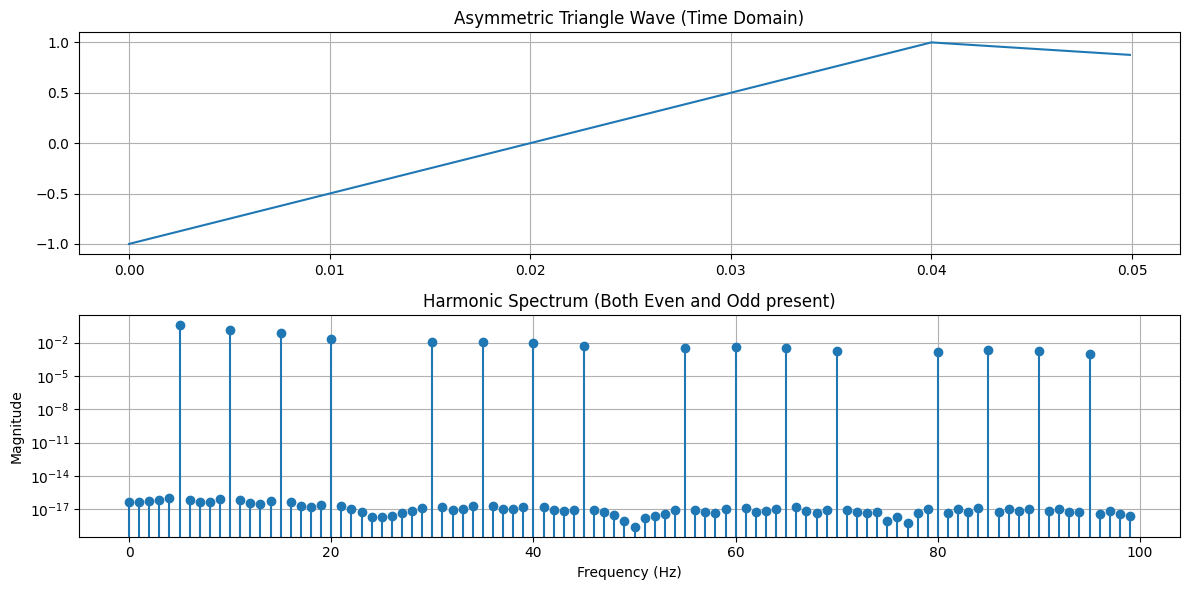

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth

# Parameters
fs = 10000          # Sampling frequency
duration = 1.0      # Seconds
freq = 5            # Fundamental frequency of the wave
t = np.linspace(0, duration, fs, endpoint=False)

# 1. Generate an Asymmetric Triangle Wave
# 'width=0.2' makes the peak occur at 20% of the cycle, breaking symmetry
asym_triangle = sawtooth(2 * np.pi * freq * t, width=0.2)

# 2. Compute the FFT to look at harmonics
fft_res = np.fft.rfft(asym_triangle)
freqs = np.fft.rfftfreq(len(t), 1/fs)
magnitude = np.abs(fft_res) / len(t)

# Plotting
plt.figure(figsize=(12, 6))

# Time Domain Plot
plt.subplot(2, 1, 1)
plt.plot(t[:500], asym_triangle[:500])
plt.title("Asymmetric Triangle Wave (Time Domain)")
plt.grid(True)

# Frequency Domain Plot (Harmonics)
plt.subplot(2, 1, 2)
plt.stem(freqs[:100], magnitude[:100])
plt.title("Harmonic Spectrum (Both Even and Odd present)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.yscale('log') # Log scale helps visualize the 1/f^2 decay
plt.grid(True)

plt.tight_layout()
plt.show()

Question 2: Yes, The difference between an aliased signal and a cleaned one is audibly significant

Question 3: Sawtooth was formed

3.1

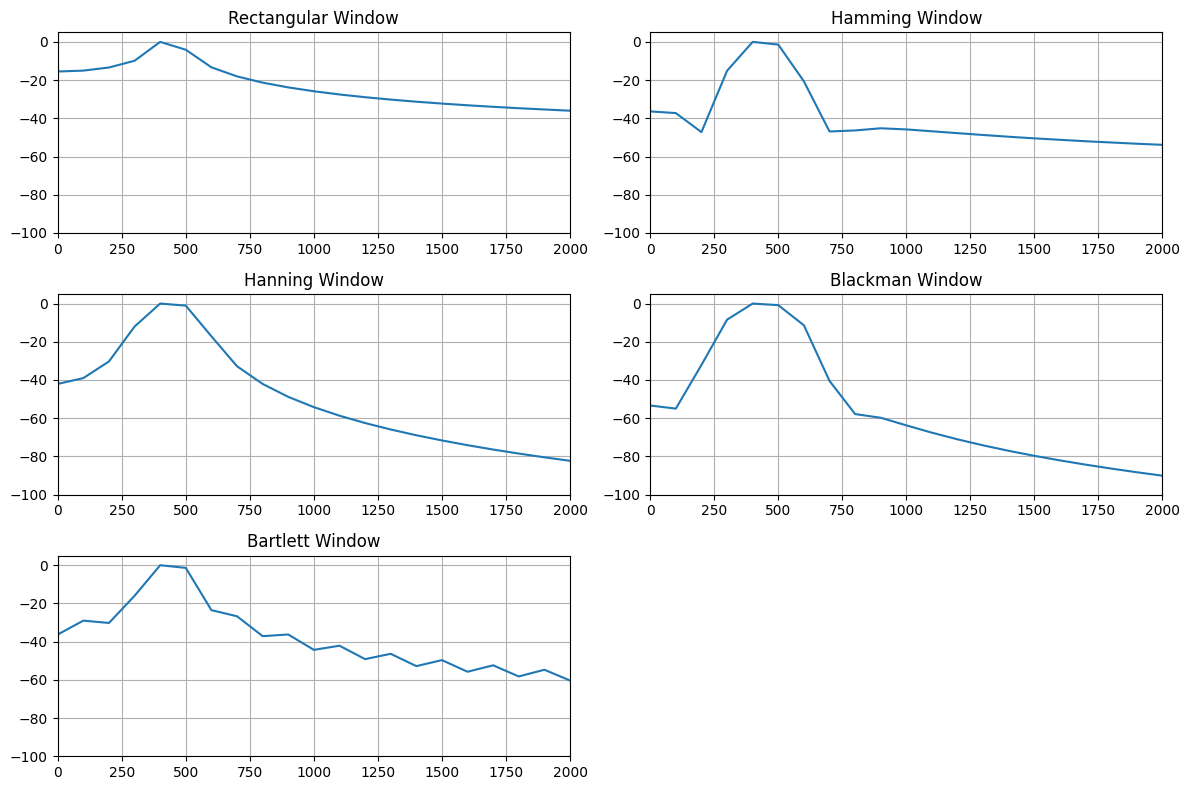

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 44100          # Sampling frequency
duration = 0.01     # Short duration to see individual bins clearly
f = 440.5           # Frequency (not an integer multiple of fs/N)

# Create the signal
t = np.arange(0, duration, 1/fs)
signal = np.sin(2 * np.pi * f * t)
N = len(signal)

# Define the windows to test
windows = {
    'Rectangular': np.ones(N),
    'Hamming': np.hamming(N),
    'Hanning': np.hanning(N),
    'Blackman': np.blackman(N),
    'Bartlett': np.bartlett(N)
}

plt.figure(figsize=(12, 8))

for i, (name, window) in enumerate(windows.items(), 1):
    # Apply window and compute FFT
    windowed_signal = signal * window
    fft_result = np.fft.rfft(windowed_signal)
    frequencies = np.fft.rfftfreq(N, 1/fs)

    # Convert to Magnitude (dB) for better visualization of leakage
    magnitude = np.abs(fft_result)
    magnitude_db = 20 * np.log10(magnitude / np.max(magnitude) + 1e-10)

    plt.subplot(3, 2, i)
    plt.plot(frequencies, magnitude_db)
    plt.title(f"{name} Window")
    plt.ylim(-100, 5)  # Focus on the leakage floor
    plt.xlim(0, 2000)
    plt.grid(True)

plt.tight_layout()
plt.show()

The choice of a window function in signal processing involves a constant trade-off between frequency resolution and the suppression of spectral leakage. Using a Rectangular window (effectively no window at all) results in the highest amount of leakage, where energy spreads far from the fundamental frequency into high-level "sidelobes." However, it maintains the narrowest main lobe, offering the best frequency resolution if the signal happens to be perfectly periodic within the window. In contrast, the Hamming window serves as a reliable all-purpose choice; it significantly reduces these sidelobes compared to the rectangular version, resulting in a much lower spectral "floor," even though the central peak becomes slightly broader.

For even cleaner results, the Hanning window functions similarly to the Hamming but tapers all the way to zero at the edges. This subtle difference allows it to provide even lower sidelobes further away from the peak, making it excellent for eliminating distant leakage. If maximum suppression is required, the Blackman window offers an even more aggressive reduction of sidelobes than both the Hamming and Hanning options. The cost of this cleanliness is a noticeably wider main lobe, which may lead to a loss in resolution where two closely spaced frequencies appear to blur into a single peak. Finally, the Bartlett window utilizes a simple triangular shape to reduce leakage better than a rectangular window; however, it is generally considered inferior for most audio applications because its sidelobes remain relatively high compared to the smoother cosine-based windows.


3.2

In [ ]:
import os

# If the repo isn't already there, clone it
if not os.path.exists('ThinkDSP'):
    !git clone https://github.com/AllenDowney/ThinkDSP.git

# Move into the directory so Python can find the modules
os.chdir('ThinkDSP/code')

# Install any missing dependencies (Colab has most, but just in case)
!pip install -q numpy scipy matplotlib

Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2733, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 2733 (delta 16), reused 40 (delta 13), pack-reused 2682 (from 2)
Receiving objects: 100% (2733/2733), 254.52 MiB | 28.39 MiB/s, done.
Resolving deltas: 100% (1481/1481), done.
Updating files: 100% (309/309), done.


In [ ]:
import numpy as np
from thinkdsp import Chirp, PI2

class SawtoothChirp(Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        """
        # Calculate the frequencies at each time step
        freqs = np.linspace(self.start, self.end, len(ts))

        # Calculate the phase (integral of frequency)
        dts = np.diff(ts, prepend=0)
        phases = np.cumsum(PI2 * freqs * dts)

        # Convert phase to a sawtooth waveform (-1 to 1)
        # We use (phases % PI2) / PI2 to get a range [0, 1],
        # then shift and scale to [-1, 1]
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  2 * frac - 1

        return ys

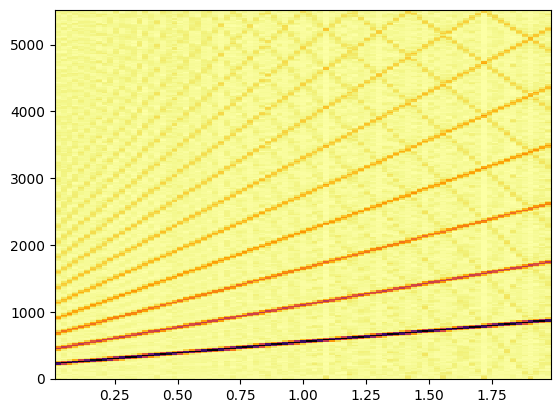

In [ ]:

signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=2, framerate=11025) # Low framerate makes aliasing obvious
spectrogram = wave.make_spectrogram(seg_length=512)
spectrogram.plot()

3.3

Spectrum saved as sawtooth_chirp_spectrum.png


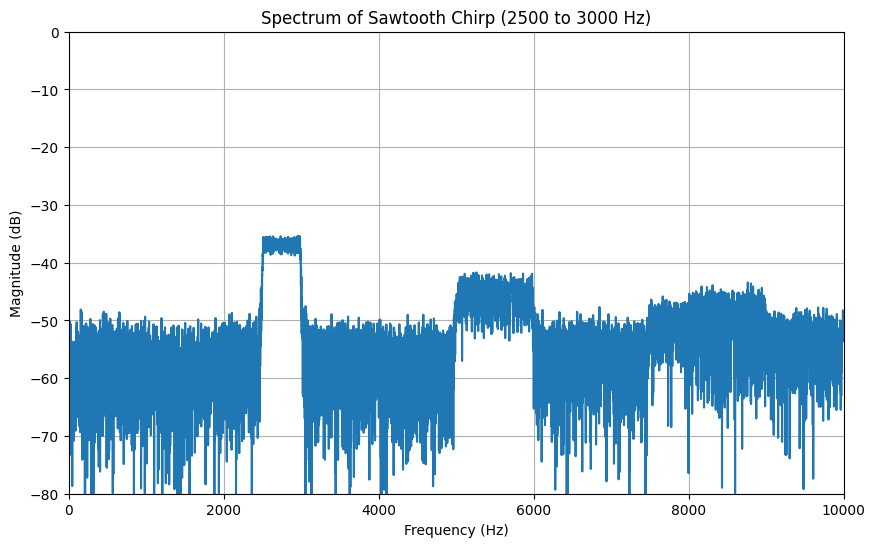

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth

# Parameters
fs = 20000  # 20 kHz
duration = 1.0  # 1 second
f0 = 2500
f1 = 3000

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Phase for a linear chirp
# f(t) = f0 + (f1 - f0) * t / duration
# phi(t) = 2 * pi * integral(f(t) dt) = 2 * pi * (f0 * t + 0.5 * (f1 - f0) * t**2 / duration)
phi = 2 * np.pi * (f0 * t + 0.5 * (f1 - f0) * t**2 / duration)

# Sawtooth wave using the phase
# signal = sawtooth(phi)
signal = sawtooth(phi)

# Compute spectrum
n = len(signal)
freqs = np.fft.rfftfreq(n, 1/fs)
magnitude = np.abs(np.fft.rfft(signal)) / n

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(freqs, 20 * np.log10(magnitude + 1e-10))
plt.title('Spectrum of Sawtooth Chirp (2500 to 3000 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.xlim(0, fs/2)
plt.ylim(-80, 0)
plt.savefig('sawtooth_chirp_spectrum.png')

print("Spectrum saved as sawtooth_chirp_spectrum.png")

3.4

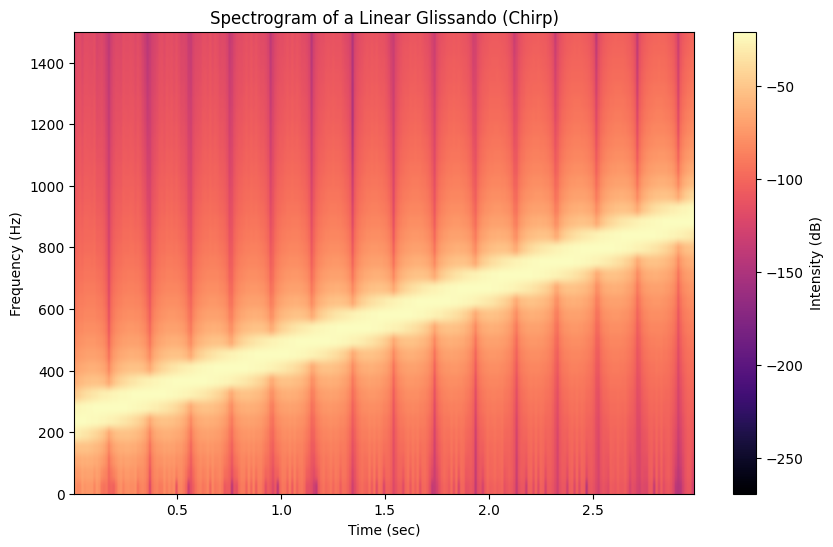

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

# Parameters
fs = 44100  # Sampling frequency
t = np.linspace(0, 3, fs * 3)  # 3 seconds duration

# Create a linear glissando (chirp) from 220Hz (A3) to 880Hz (A5)
glissando = chirp(t, f0=220, f1=880, t1=3, method='linear')

# Plotting the Spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(glissando, Fs=fs, NFFT=1024, noverlap=512, cmap='magma')
plt.title("Spectrogram of a Linear Glissando (Chirp)")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (sec)")
plt.ylim(0, 1500)  # Focus on the audible range
plt.colorbar(label='Intensity (dB)')
plt.show()

3.5

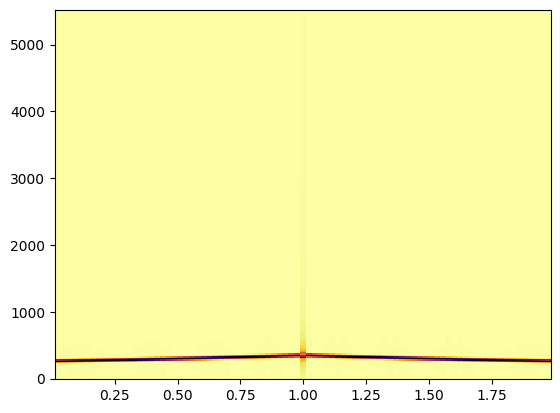

In [ ]:
import numpy as np
from thinkdsp import Chirp, Wave

class TromboneGliss(Chirp):
    """Represents a trombone-like glissando (hyperbolic chirp)."""

    def evaluate(self, ts):
        """Calculates the frequencies at given times.

        ts: float array of times
        """
        # Linear change in length results in f(t) = 1 / (A + Bt)
        # We solve for A and B using f1 at t=0 and f2 at t=duration
        l1 = 1.0 / self.start
        l2 = 1.0 / self.end

        # Calculate lengths over time
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1.0 / lengths

        # Calculate phase (integral of frequency)
        dts = np.diff(ts, prepend=0)
        phases = np.cumsum(2 * np.pi * freqs * dts)

        return np.cos(phases)

# Simulation: C3 (262 Hz) to F3 (349 Hz) and back
low_f = 262
high_f = 349

# Upward glissando
up = TromboneGliss(start=low_f, end=high_f)
wave1 = up.make_wave(duration=1.0, framerate=11025)

# Downward glissando
down = TromboneGliss(start=high_f, end=low_f)
wave2 = down.make_wave(duration=1.0, framerate=11025)

# Combine and plot spectrogram
glissando_wave = wave1 | wave2
glissando_wave.make_spectrogram(512).plot()

To summarize, the pitch of a trombone is determined by the length of its tubing. Because a player extending the slide at a steady speed increases that length linearly over time, the resulting frequency follows a hyperbolic (inverse) curve rather than a straight line.  If you plot the spectrogram, you'll notice the line is slightly curved. Because humans perceive pitch logarithmically, a linear movement of the slide feels "slower" at the bottom of the range and "faster" at the top. To our ears, a linear chirp sounds more "natural," but a trombone glissando is physically hyperbolic.  The graph is neither linear nor exponential.

3.6

In [ ]:
import numpy as np
from scipy.io import wavfile

def generate_vowel(duration, sr, f0, f1, f2):
    t = np.linspace(0, duration, int(sr * duration))
    # Basic buzz (fundamental frequency)
    buzz = np.sin(2 * np.pi * f0 * t)
    # Apply formants (simplified as resonant peaks)
    vowel = (np.sin(2 * np.pi * f1 * t) * 0.5 +
             np.sin(2 * np.pi * f2 * t) * 0.3) * buzz
    return vowel

sr = 44100
# Formant frequencies (F1, F2) for a typical male voice
vowels = {
    "ee": (270, 2290),
    "ah": (730, 1090),
    "oo": (300, 870)
}

audio_data = []
for name, (f1, f2) in vowels.items():
    audio_data.append(generate_vowel(1.0, sr, 120, f1, f2))
    audio_data.append(np.zeros(int(sr * 0.2))) # gap

final_audio = np.concatenate(audio_data)
final_audio = (final_audio * 32767).astype(np.int16)
wavfile.write('vowels.wav', sr, final_audio)
print("File 'vowels.wav' created successfully!")

File 'vowels.wav' created successfully!


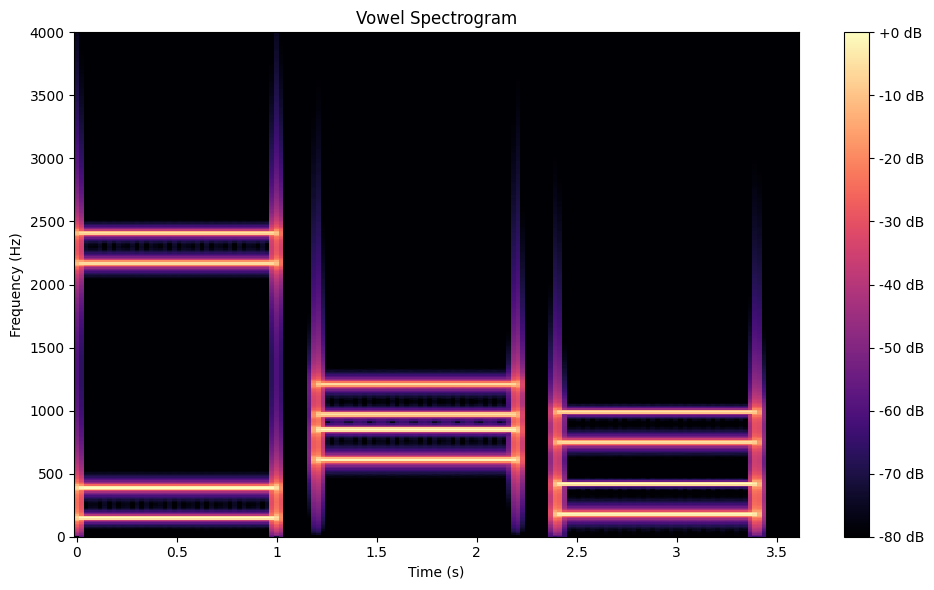

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 1. Load your audio file
# Replace 'vowels.wav' with the path to your recording
filename = 'vowels.wav'
y, sr = librosa.load(filename)

# 2. Compute the Short-Time Fourier Transform (STFT)
# We use a log scale for frequency to make formants easier to see
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# 3. Display the Spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', cmap='magma')

# 4. Formatting the view
plt.colorbar(format='%+2.0f dB')
plt.title('Vowel Spectrogram')
plt.ylim(0, 4000)  # Human speech formants are usually below 4000Hz
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()

plt.show()

Question 5

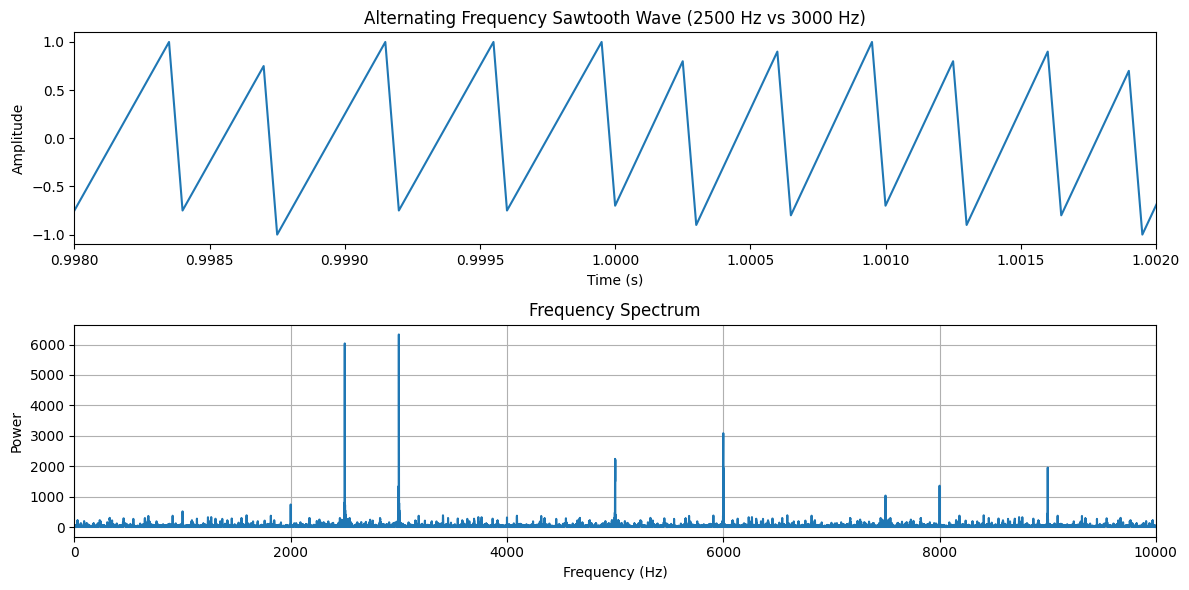

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth

# Parameters
fs = 20000        # 20 kHz Frame rate
duration = 2.0    # 2 seconds total to see the switch
f_low = 2500      # Low frequency (Hz)
f_high = 3000     # High frequency (Hz)

# Create time array
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# 1. Create the frequency array (jumps every 1 second)
# This creates a square-wave pattern for the frequency itself
frequencies = np.where((t % 2) < 1, f_low, f_high)

# 2. Calculate the Phase (Integration)
# Phase is the integral of frequency over time: phi(t) = 2 * pi * sum(f * dt)
phase = 2 * np.pi * np.cumsum(frequencies) / fs

# 3. Generate the Sawtooth Wave
waveform = sawtooth(phase)

# --- Plotting the Results ---

# Plot the Waveform (Zoomed in at the 1-second mark to see the switch)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, waveform)
plt.title("Alternating Frequency Sawtooth Wave (2500 Hz vs 3000 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0.998, 1.002) # Zoomed to show the transition at 1.0s

# Plot the Spectrum
plt.subplot(2, 1, 2)
fft = np.fft.rfft(waveform)
freq_axis = np.fft.rfftfreq(len(waveform), 1/fs)
plt.plot(freq_axis, np.abs(fft))
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim(0, 10000) # Show up to Nyquist (10kHz)
plt.grid(True)

plt.tight_layout()
plt.show()

Question 6

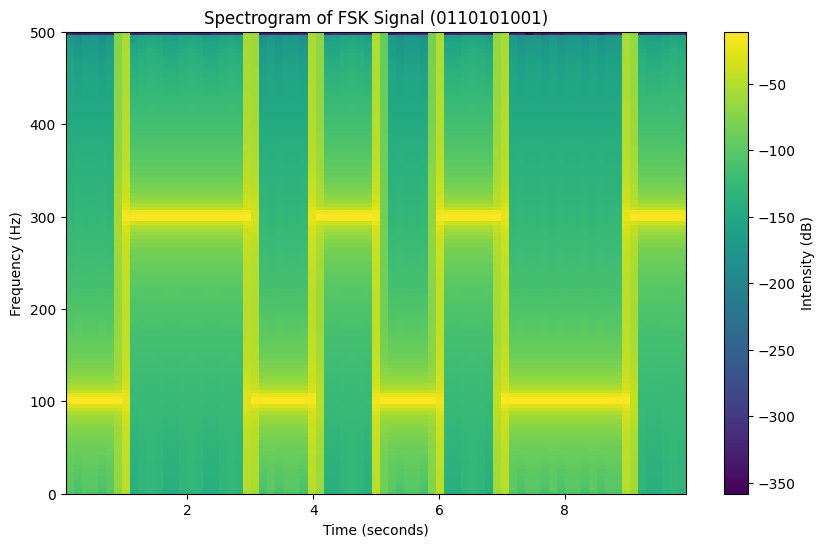

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
binary_data = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]
fs = 1000  # Sampling frequency (Hz)
t_per_bit = 1.0  # Seconds per bit
f0 = 100  # Frequency for '0' (Hz)
f1 = 300  # Frequency for '1' (Hz)

# Generate Signal
t = np.arange(0, len(binary_data) * t_per_bit, 1/fs)
signal = np.array([])

for bit in binary_data:
    freq = f1 if bit == 1 else f0
    t_bit = np.arange(0, t_per_bit, 1/fs)
    wave = np.sin(2 * np.pi * freq * t_bit)
    signal = np.concatenate((signal, wave))

# Plotting the Spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(signal, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
plt.title('Spectrogram of FSK Signal (0110101001)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 500)  # Zoom in on our frequencies
plt.colorbar(label='Intensity (dB)')
plt.show()


To recover 10 binary values from an oscillation using Frequency Shift Keying (FSK), you map each bit to a specific frequency—for example, $f_0 = 100 \text{ Hz}$ for a 0 and $f_1 = 300 \text{ Hz}$ for a 1—and transmit each for exactly one second. This creates a 10-second signal that fluctuates between two distinct "notes" according to the binary sequence. When visualized through a spectrogram, which plots frequency over time, the signal appears as a series of bright horizontal segments at two different heights on the y-axis. By dividing the x-axis into one-second intervals and identifying whether the bright energy pulse resides on the upper or lower frequency track, you can visually decode the original binary string. This method provides a clear, time-stamped record of the data, where the vertical position of the signal indicates the bit value and the horizontal duration indicates the transmission timing.
